In [1]:
from constants import *
from scraper import *
df_s = get_arxiv_dataframe(subcats, max_results=50)
df_s.to_csv("arxiv_papers_cleaned.csv", index=False)
print(df_s.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessiezh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jessiezh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fetching data for subcategory: cs.AI under cs...
Fetching data for subcategory: cs.AR under cs...
Fetching data for subcategory: cs.CC under cs...
Fetching data for subcategory: cs.CE under cs...
Fetching data for subcategory: cs.CG under cs...
Fetching data for subcategory: cs.CL under cs...
Fetching data for subcategory: cs.CR under cs...
Fetching data for subcategory: cs.CV under cs...
Fetching data for subcategory: cs.CY under cs...
Fetching data for subcategory: cs.DB under cs...
Fetching data for subcategory: cs.DC under cs...
Fetching data for subcategory: cs.DL under cs...
Fetching data for subcategory: cs.DM under cs...
Fetching data for subcategory: cs.DS under cs...
Fetching data for subcategory: cs.ET under cs...
Fetching data for subcategory: cs.FL under cs...
Fetching data for subcategory: cond-mat.dis-nn under cond-mat...
Fetching data for subcategory: cond-mat.mtrl-sci under cond-mat...
Fetching data for subcategory: cond-mat.mes-hall under cond-mat...
Fetching data for

In [1]:
import pandas as pd

# Load your clustered papers
df = pd.read_csv('clustering_results/papers_with_clusters.csv')

# Ignore noise points (-1 cluster)
df = df[df["cluster"] != -1]

# Group by subcategory
subcat_cluster_dist = df.groupby(['subcategory', 'cluster']).size().unstack(fill_value=0)

# Normalize to percentage
subcat_cluster_percent = subcat_cluster_dist.div(subcat_cluster_dist.sum(axis=1), axis=0)

# Show the distribution
print(subcat_cluster_percent)


cluster           0         1         2         3    4         5    6    7    \
subcategory                                                                    
astro-ph.CO  0.000000  0.000000  0.000000  0.159091  0.0  0.022727  0.0  0.0   
astro-ph.EP  0.000000  0.000000  0.219512  0.000000  0.0  0.000000  0.0  0.0   
astro-ph.GA  0.000000  0.000000  0.000000  0.225806  0.0  0.000000  0.0  0.0   
astro-ph.HE  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
astro-ph.IM  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
...               ...       ...       ...       ...  ...       ...  ...  ...   
stat.CO      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
stat.ME      0.116279  0.116279  0.000000  0.000000  0.0  0.046512  0.0  0.0   
stat.ML      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
stat.OT      0.000000  0.000000  0.000000  0.000000  0.0  0.111111  0.0  0.0   
stat.TH      0.000000  0.000000  0.00000

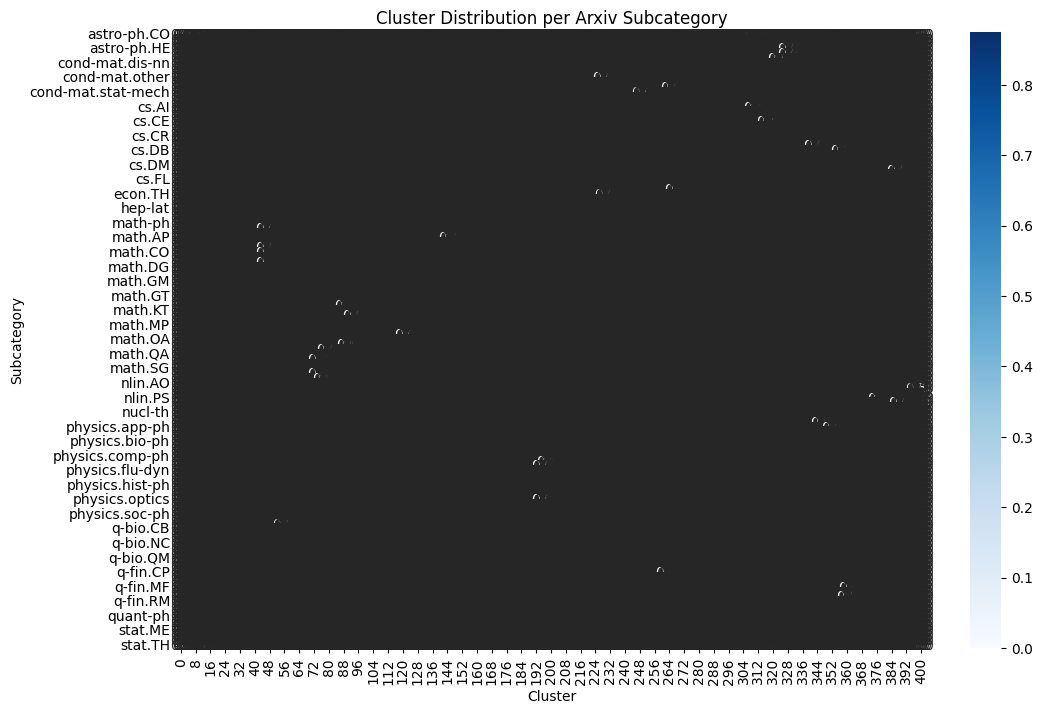

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(subcat_cluster_percent, cmap="Blues", annot=True, fmt=".1f")
plt.title("Cluster Distribution per Arxiv Subcategory")
plt.xlabel("Cluster")
plt.ylabel("Subcategory")
plt.show()

In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from constants.constants_map import subcat_fullname_mapping
df = pd.read_csv('clustering_results/papers_with_clusters.csv')
df["text"] = df["title"].fillna("") + " " + df["cleaned_abstract"].fillna("")
    # df["fine_topic_label"] = df["fine_topic_label"].str.strip().str.lower().str.replace(" ", "_")
df["full_label"] = (
df["category"].str.lower().str.replace(" ", "_") + "_" +
df["subcategory"].map(subcat_fullname_mapping).str.lower().str.replace(" ", "_") + "_" +
df["fine_topic_label"].str.lower().str.replace(" ", "_")
)

  
le = LabelEncoder()
df["label_id"] = le.fit_transform(df["full_label"])
x_train, x_val, y_train, y_val = train_test_split(
        df["text"].tolist(), df["label_id"].tolist(), test_size=0.2, random_state=42
    )
print(Counter(y_train))
print(Counter(y_val))

print(df.size)
print(df.dropna().size)

Counter({399: 42, 370: 41, 407: 40, 320: 39, 303: 39, 71: 39, 400: 38, 163: 38, 326: 37, 456: 37, 308: 37, 311: 36, 109: 36, 339: 36, 37: 36, 333: 36, 402: 36, 421: 36, 158: 35, 51: 35, 393: 35, 230: 35, 453: 35, 322: 34, 39: 34, 392: 34, 45: 34, 236: 34, 300: 33, 342: 33, 397: 33, 82: 33, 47: 32, 305: 32, 449: 32, 350: 32, 328: 32, 445: 32, 23: 32, 390: 32, 438: 31, 286: 31, 289: 30, 368: 30, 86: 30, 317: 30, 345: 30, 404: 30, 131: 30, 53: 30, 151: 30, 395: 29, 441: 29, 13: 29, 348: 29, 462: 29, 252: 29, 418: 29, 292: 29, 353: 28, 19: 28, 180: 28, 260: 28, 63: 28, 245: 27, 113: 27, 146: 27, 278: 27, 140: 26, 61: 26, 40: 26, 123: 26, 162: 26, 128: 26, 413: 26, 283: 25, 265: 25, 242: 25, 357: 25, 0: 25, 434: 25, 168: 24, 409: 24, 372: 24, 35: 24, 42: 23, 461: 23, 57: 23, 10: 23, 120: 23, 77: 23, 376: 22, 433: 22, 87: 22, 221: 21, 228: 21, 101: 21, 256: 21, 102: 21, 467: 21, 276: 21, 73: 20, 335: 19, 95: 19, 8: 19, 108: 19, 238: 18, 204: 18, 90: 18, 185: 17, 26: 17, 267: 17, 377: 17, 161

In [43]:
import joblib
label_encoder = joblib.load("label_encoder.pkl")
print("Classes:", label_encoder.classes_)
print("Num classes:", len(label_encoder.classes_))

Classes: ['astrophysics_cosmology_and_nongalactic_astrophysics'
 'astrophysics_data-driven_algorithmic_problem_solving_in_time'
 'astrophysics_earth_and_planetary_astrophysics'
 'astrophysics_financial_market_lattice_models'
 'astrophysics_galactic_astrophysics'
 'astrophysics_high_energy_astrophysical_phenomena'
 'astrophysics_instrumentation_and_methods_for_astrophysics'
 'astrophysics_magnetic_polarization_of_dark_stars'
 'astrophysics_magnetic_ring_field_in_physics'
 'astrophysics_modeling_field_mechanisms_for_solution_development'
 'astrophysics_solar_and_stellar_astrophysics'
 'astrophysics_thermal_observations_of_stellar_planets'
 'astrophysics_x-ray_emission_from_gas_in_stellar_regions'
 'condensed_matter_automata_modeling_in_finite_languages'
 'condensed_matter_critical_spin_phase_modeling'
 'condensed_matter_disordered_systems_and_neural_networks'
 'condensed_matter_gene_network_models'
 'condensed_matter_magnetic_ring_field_in_physics'
 'condensed_matter_materials_science'
 

In [50]:
import numpy as np

# Convert to list first
class_list = list(label_encoder.classes_)

# Filter out actual NaN (not the string 'nan')
class_list_clean = [c for c in class_list if c == c]  # np.nan != np.nan so this filters out real NaNs

# OR if it's a string 'nan'
# class_list_clean = [c for c in class_list if c != 'nan']
nan_idx = next(i for i, c in enumerate(class_list) if c != c)
nan_idx

213

In [52]:
cat_fullname_mapping = {
    "astro-ph": "Astrophysics",
    "cond-mat": "Condensed Matter",
    "cs": "Computer Science",
    "econ": "Economics",
    "hep-th": "High Energy Physics - Theory",
    "hep-ex": "High Energy Physics - Experiment",
    "hep-ph": "High Energy Physics - Phenomenology",
    "gr-qc": "General Relativity and Quantum Cosmology",
    "quant-ph": "Quantum Physics",
    "q-fin": "Quantitative Finance",
    "nucl-ex": "Nuclear Experiment",
    "CoRR": "Computing Research Repository",
    "nlin": "Nonlinear Sciences",
    "physics": "Physics",
    "math-ph": "Mathematical Physics",
    "math": "Mathematics",
    "q-bio": "Quantitative Biology",
    "nucl-th": "Nuclear Theory",
    "stat": "Statistics"
}
mapped_categories = df["category"].map(cat_fullname_mapping)
print("NaNs from mapping:", mapped_categories.isna().sum())

# Check final full_label NaNs
print("NaNs in full_label:", df["full_label"].isna().sum())

NaNs from mapping: 50
NaNs in full_label: 0


In [55]:
unknown_categories = df[~df['category'].isin(cat_fullname_mapping.keys())]['category'].unique()
print("Unknown categories:", unknown_categories)



Unknown categories: ['hep-lat']


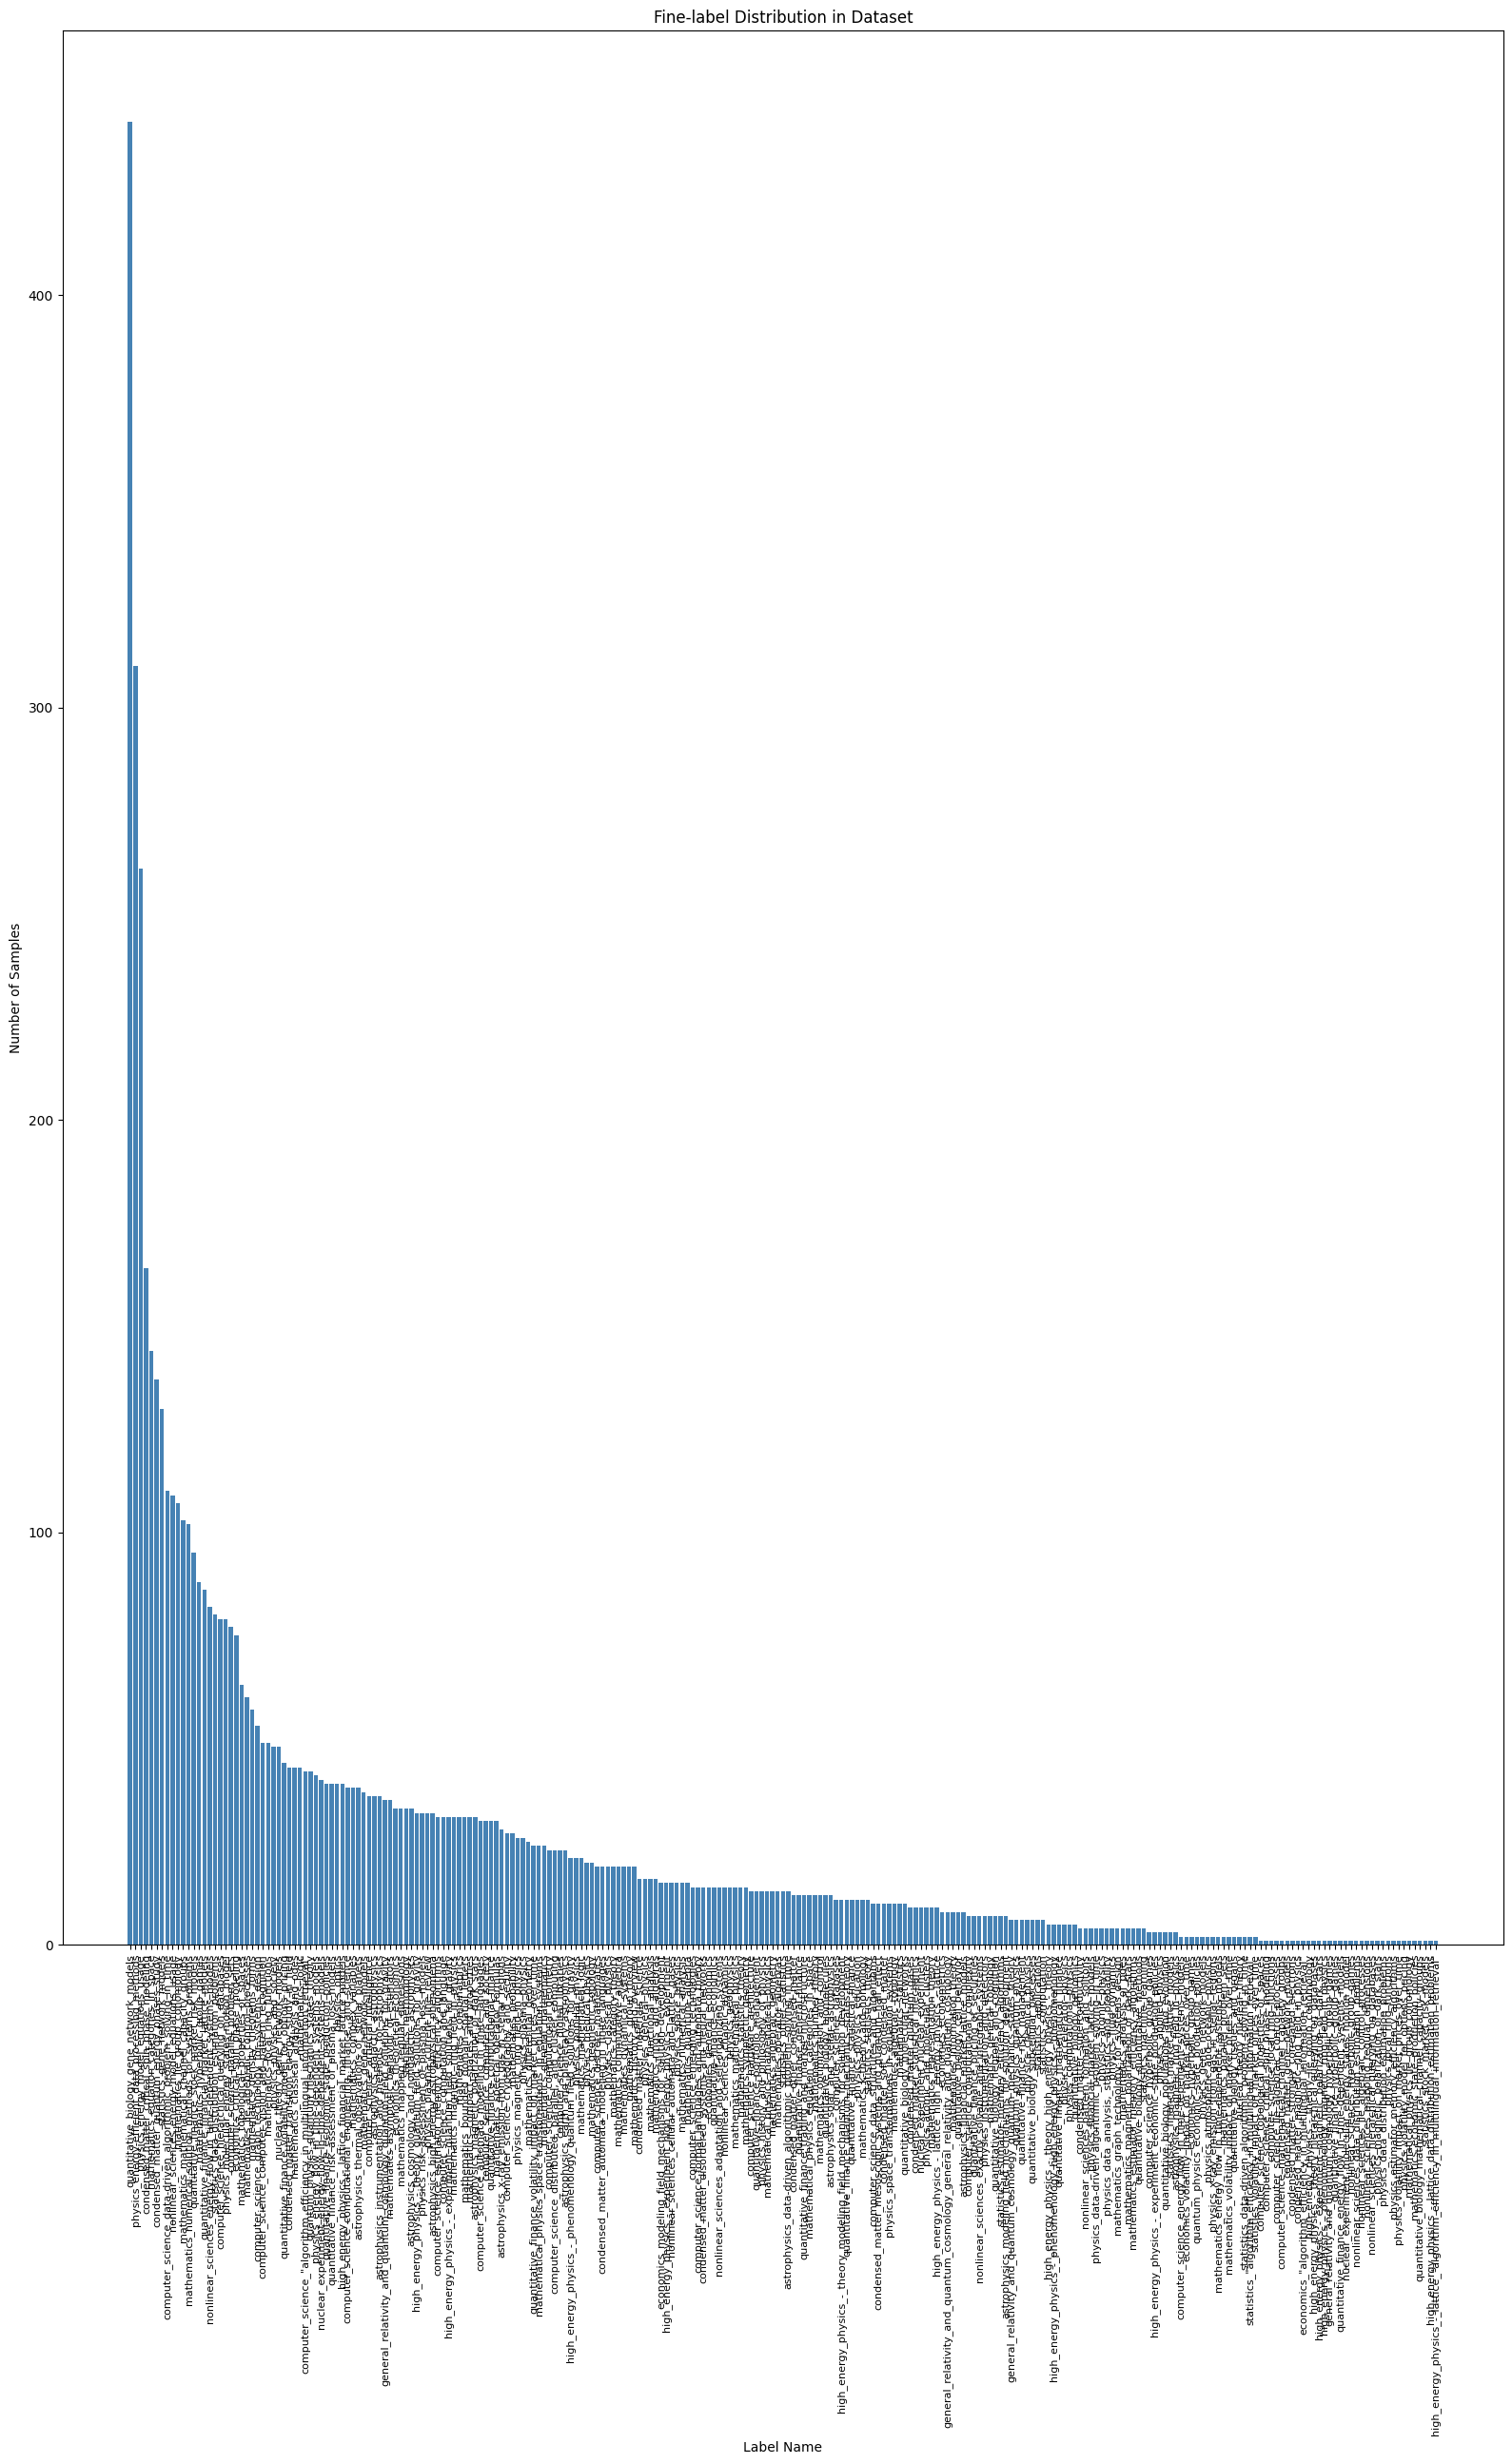

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from constants.constants_map import cat_fullname_mapping

# Load dataset
df = pd.read_csv("./clustering_results/papers_with_clusters.csv")

# Build full label like in your training pipeline
df["text"] = df["title"].fillna("") + " " + df["cleaned_abstract"].fillna("")
df = df[df["category"].notna() & df["fine_topic_label"].notna()].copy()
df["full_label"] = (
    df["category"].map(cat_fullname_mapping).str.lower().str.replace(" ", "_") + "_" +
    df["fine_topic_label"].str.lower().str.replace(" ", "_")
)
df = df[df["full_label"].notna()].copy()

# Encode labels
le = LabelEncoder()
df["label_id"] = le.fit_transform(df["full_label"])

# Count label distribution
label_counts = Counter(df["label_id"])
labels, counts = zip(*sorted(label_counts.items(), key=lambda x: x[1], reverse=True))
label_names = le.inverse_transform(labels)

# Plot using only matplotlib
plt.figure(figsize=(16, 26))
plt.bar(label_names, counts, color="steelblue")
plt.xticks(rotation=90, fontsize=8)
plt.title("Fine-label Distribution in Dataset")
plt.xlabel("Label Name")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

df = pd.read_csv("./clustering_results/papers_with_clusters.csv")  # Adjust path if needed


pivot = (
    df.groupby(["category", "subcategory", "fine_topic_label"])
      .size()
      .reset_index(name="paper_count")
      .sort_values(by=["category", "subcategory", "paper_count"], ascending=[True, True, False])
)

pivot.to_csv("label_distribution_summary.csv", index=False)
print(pivot.head(20))


    category      subcategory                              fine_topic_label  \
1   astro-ph      astro-ph.CO              Dark Energy Neutrino Interaction   
2   astro-ph      astro-ph.CO                         Galaxy Mass Evolution   
0   astro-ph      astro-ph.CO        Cosmology and Nongalactic Astrophysics   
4   astro-ph      astro-ph.EP                     Polarization Comets Solar   
5   astro-ph      astro-ph.EP                  Secondary Planetary Eclipses   
3   astro-ph      astro-ph.EP              Earth and Planetary Astrophysics   
8   astro-ph      astro-ph.GA                Magnetic Star Mass Interaction   
6   astro-ph      astro-ph.GA                      Emission Ionized Diffuse   
7   astro-ph      astro-ph.GA                         Galactic Astrophysics   
9   astro-ph      astro-ph.HE                         Gammaray Grb Emission   
11  astro-ph      astro-ph.HE                Radio-Optical Spectra Analysis   
10  astro-ph      astro-ph.HE           High Energy 

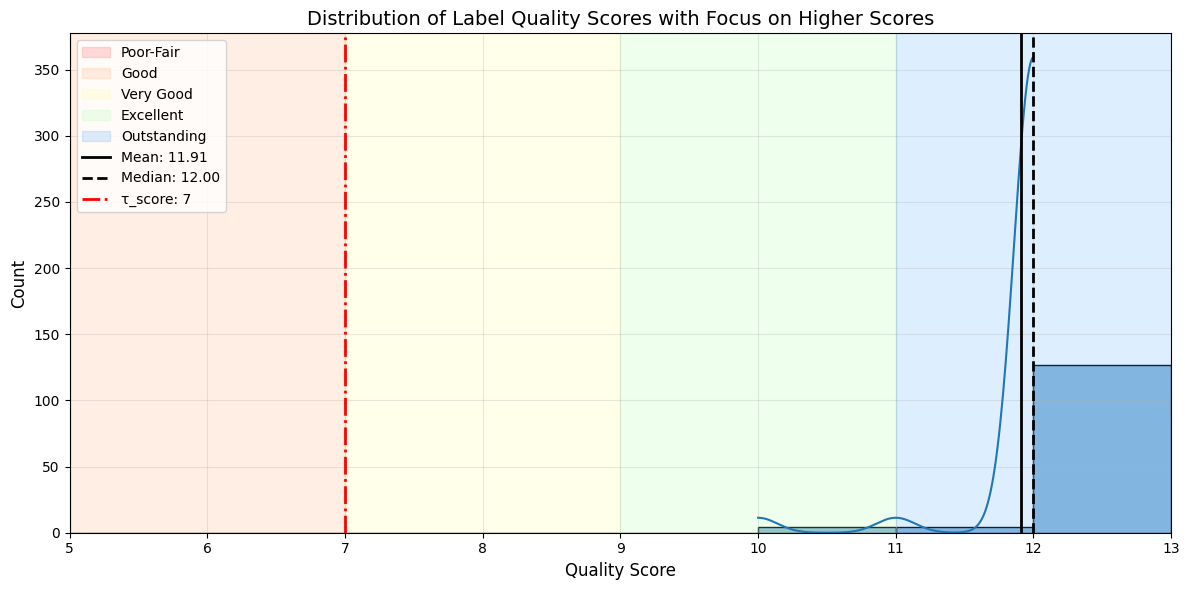

Mean: 11.91
Median: 12.00
Percentage above threshold (≥7): 100.0%
Percentage of top scores (≥10): 100.0%


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


# Assuming df is loaded with your label_quality_report.csv
# df = pd.read_csv('label_quality_report.csv')

# Create figure
plt.figure(figsize=(12, 6))

# Create custom colormap for quality bands
colors = ["#FF5555", "#FFAA77", "#FFFF99", "#AAFFAA", "#55AAFF"]
cmap = LinearSegmentedColormap.from_list("quality_cmap", colors, N=5)

# Calculate statistics
mean_score = df['quality_score'].mean()
median_score = df['quality_score'].median()
threshold = 7  # τ_score

# Create custom bins with more resolution at higher scores
bins = [0, 5, 7, 9, 10, 11, 12, 13]  # Emphasize higher score range

# Plot histogram with KDE
sns.histplot(df['quality_score'], bins=bins, kde=True)

# Add colored background for quality tiers
for i, (start, end, label, color) in enumerate([
    (0, 5, "Poor-Fair", colors[0]),  # Combine lower tiers
    (5, 7, "Good", colors[1]),
    (7, 9, "Very Good", colors[2]),
    (9, 11, "Excellent", colors[3]),
    (11, 13, "Outstanding", colors[4])  # Add highest tier
]):
    plt.axvspan(start, end, alpha=0.2, color=color, label=label)

# Add statistics lines
plt.axvline(mean_score, color='black', linestyle='-', linewidth=2, 
           label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='black', linestyle='--', linewidth=2,
           label=f'Median: {median_score:.2f}')
plt.axvline(threshold, color='red', linestyle='-.', linewidth=2,
           label=f'τ_score: {threshold}')

# Format plot
plt.title('Distribution of Label Quality Scores with Focus on Higher Scores', fontsize=14)
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis limits to focus on higher scores
plt.xlim(5, 13)  # Start from 5 to focus on higher scores

# Adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper left')

plt.tight_layout()
plt.savefig('label_quality_highscores.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Percentage above threshold (≥7): {(df['quality_score'] >= 7).mean()*100:.1f}%")
print(f"Percentage of top scores (≥10): {(df['quality_score'] >= 10).mean()*100:.1f}%")

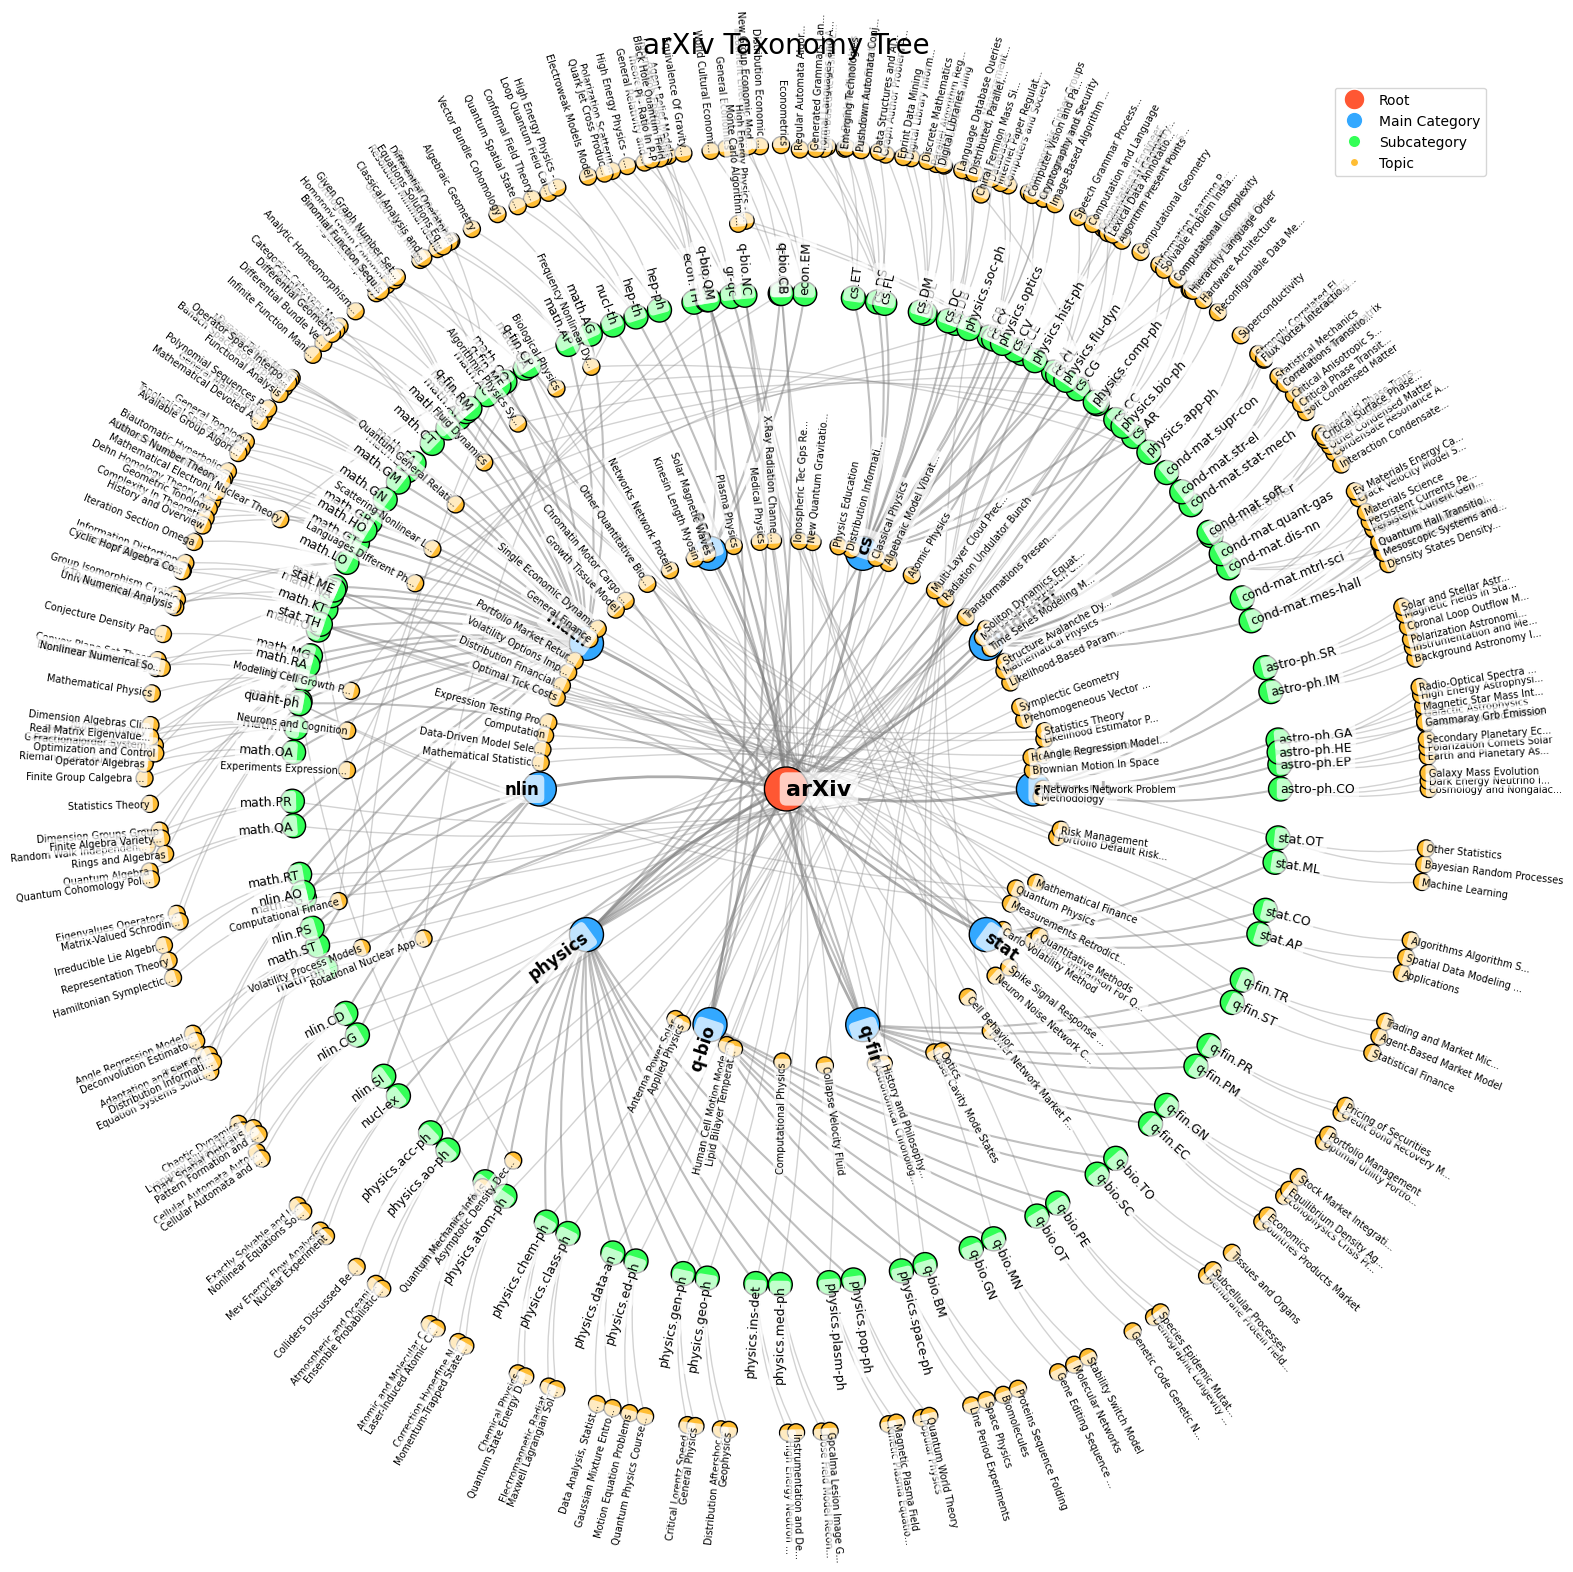

In [35]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

# Load the taxonomy tree from the JSON file
with open('constants/taxonomy_tree.json', 'r') as f:
    taxonomy_data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add the root node
G.add_node("arXiv", level=0)

# Add main categories, subcategories, and their labels
for main_cat, subcats in taxonomy_data.items():
    # Add main category
    G.add_node(main_cat, level=1)
    G.add_edge("arXiv", main_cat)
    
    # For main categories with direct subcategories
    if isinstance(subcats, dict):
        for subcat, topics in subcats.items():
            # Add subcategory
            G.add_node(subcat, level=2)
            G.add_edge(main_cat, subcat)
            
            # Add topics/labels
            for i, topic in enumerate(topics):
                topic_id = f"{subcat}_{i}"
                G.add_node(topic_id, level=3, label=topic)
                G.add_edge(subcat, topic_id)
    elif isinstance(subcats, list):
        # For main categories with direct topics
        for i, topic in enumerate(subcats):
            topic_id = f"{main_cat}_{i}"
            G.add_node(topic_id, level=2, label=topic)
            G.add_edge(main_cat, topic_id)

# Function to compute radial layout with custom positioning
def radial_pos(G, root="arXiv", width=1, height=1, scale=1):
    pos = {}
    
    # Get nodes by level
    nodes_by_level = {}
    for node in G.nodes():
        level = G.nodes[node].get('level', 0)
        if level not in nodes_by_level:
            nodes_by_level[level] = []
        nodes_by_level[level].append(node)
    
    # Position the root node at the center
    pos[root] = np.array([0, 0])
    
    # Position nodes by level in concentric circles
    max_level = max(nodes_by_level.keys())
    for level in range(1, max_level + 1):
        nodes = nodes_by_level[level]
        radius = level * scale
        n_nodes = len(nodes)
        
        # Assign positions for nodes at this level
        for i, node in enumerate(nodes):
            # Calculate angle
            angle = 2 * math.pi * i / n_nodes
            # Adjust angle slightly based on parent position for non-root nodes
            if level > 1:
                parent = list(G.predecessors(node))[0]
                parent_angle = math.atan2(pos[parent][1], pos[parent][0])
                angle = (angle + parent_angle) / 2 if i % 3 == 0 else angle
            
            # Place node on the circle
            pos[node] = np.array([
                radius * math.cos(angle) * width,
                radius * math.sin(angle) * height
            ])
    
    return pos

# Create a figure with the right size
plt.figure(figsize=(16, 16))

# Generate positions
pos = radial_pos(G, width=1, height=1, scale=5)

# Adjust level 3 positions to be closer to their parents
for node in G.nodes():
    if G.nodes[node].get('level') == 3:
        parent = list(G.predecessors(node))[0]
        # Move 40% closer to parent
        pos[node] = pos[node] * 0.6 + pos[parent] * 0.4

# Draw the edges
for u, v in G.edges():
    u_level = G.nodes[u].get('level', 0)
    v_level = G.nodes[v].get('level', 0)
    # Vary edge width and color by level
    width = 2.5 - v_level * 0.5  # thinner for outer edges
    alpha = 0.8 - v_level * 0.15  # more transparent for outer edges
    line = FancyArrowPatch(
        pos[u], pos[v],
        arrowstyle='-',
        alpha=alpha,
        linewidth=width,
        connectionstyle=f'arc3,rad=0.1',
        color='gray'
    )
    plt.gca().add_patch(line)

# Draw the nodes with different sizes and colors based on level
node_sizes = []
node_colors = []
for node in G.nodes():
    level = G.nodes[node].get('level', 0)
    if level == 0:  # Root
        node_sizes.append(1000)
        node_colors.append('#FF5733')  # Red-orange
    elif level == 1:  # Main category
        node_sizes.append(600)
        node_colors.append('#33A8FF')  # Blue
    elif level == 2:  # Subcategory
        node_sizes.append(300)
        node_colors.append('#33FF57')  # Green
    else:  # Topics
        node_sizes.append(150)
        node_colors.append('#FFBD33')  # Yellow-orange

# Draw the nodes
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    edgecolors='black',
    linewidths=1
)

# Add labels with different font sizes based on level
labels = {}
for node in G.nodes():
    level = G.nodes[node].get('level', 0)
    if level <= 2:
        # For main categories and subcategories, use node ID
        labels[node] = node
    else:
        # For topics, use the actual topic label
        labels[node] = G.nodes[node].get('label', node)

# Draw the labels with adjusted positions and font sizes
for node, (x, y) in pos.items():
    level = G.nodes[node].get('level', 0)
    label = labels[node]
    
    # Adjust font size based on level
    if level == 0:
        fontsize = 16
        weight = 'bold'
    elif level == 1:
        fontsize = 12
        weight = 'bold'
    elif level == 2:
        fontsize = 9
        weight = 'normal'
    else:
        fontsize = 7
        weight = 'normal'
        # Truncate long topic labels
        if len(label) > 25:
            label = label[:22] + '...'
    
    # Add text with proper rotation
    angle = math.atan2(y, x) * 180 / math.pi
    if angle < -90 or angle > 90:
        angle += 180
        ha = 'right'
    else:
        ha = 'left'
    
    plt.text(
        x, y, label,
        fontsize=fontsize,
        weight=weight,
        ha=ha,
        va='center',
        rotation=angle,
        rotation_mode='anchor',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7)
    )

# Remove axis
plt.axis('off')

# Set title
plt.title('arXiv Taxonomy Tree', fontsize=20, pad=20)

# Add a legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF5733', markersize=15, label='Root'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#33A8FF', markersize=12, label='Main Category'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#33FF57', markersize=9, label='Subcategory'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFBD33', markersize=6, label='Topic')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('arxiv_taxonomy_tree.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

KeyError: 'gr-qc'

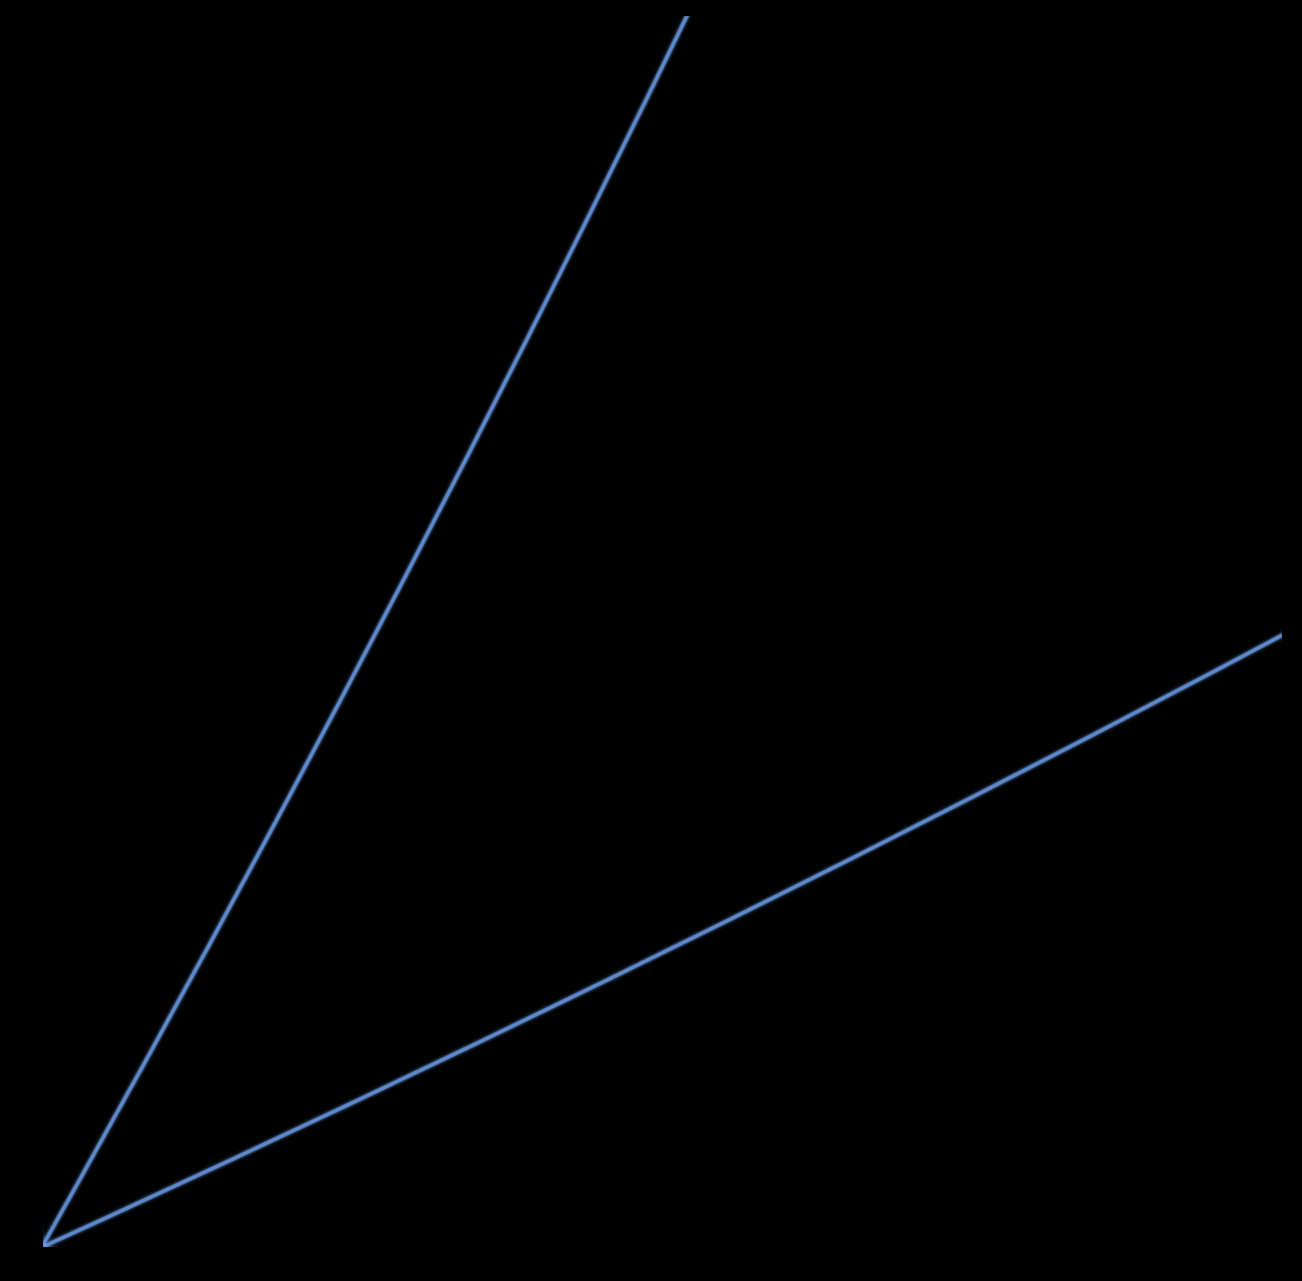

In [30]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

# Load the taxonomy tree from the JSON file
with open('constants/taxonomy_tree.json', 'r') as f:  # Fixed path - remove 'constants/' if the file is in the root directory
    taxonomy_data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add the root node
G.add_node("arXiv", level=0)

# Add main categories and subcategories (without topics/labels)
for main_cat, subcats in taxonomy_data.items():
    # Add main category
    G.add_node(main_cat, level=1)
    G.add_edge("arXiv", main_cat)
    
    # For main categories with direct subcategories
    if isinstance(subcats, dict):
        for subcat in subcats.keys():
            # Add subcategory
            G.add_node(subcat, level=2)
            G.add_edge(main_cat, subcat)
    # Some categories may not have subcategories in the taxonomy

# Function to compute radial layout with custom positioning
def radial_pos(G, root="arXiv", width=1, height=1, scale=1):
    pos = {}
    
    # Get nodes by level
    nodes_by_level = {}
    for node in G.nodes():
        level = G.nodes[node].get('level', 0)
        if level not in nodes_by_level:
            nodes_by_level[level] = []
        nodes_by_level[level].append(node)
    
    # Position the root node at the center
    pos[root] = np.array([0, 0])
    
    # Group nodes by parent to keep related nodes closer
    nodes_by_parent = {}
    for node in G.nodes():
        if node != root:
            parent = list(G.predecessors(node))[0]
            if parent not in nodes_by_parent:
                nodes_by_parent[parent] = []
            nodes_by_parent[parent].append(node)
    
    # Position level 1 nodes (main categories) in a circle
    nodes = nodes_by_level.get(1, [])
    radius = 1 * scale
    for i, node in enumerate(nodes):
        angle = 2 * math.pi * i / len(nodes)
        pos[node] = np.array([
            radius * math.cos(angle) * width,
            radius * math.sin(angle) * height
        ])
    
    # Position level 2 nodes (subcategories) with respect to their parents
    nodes = nodes_by_level.get(2, [])
    radius = 2 * scale
    
    # First, group subcategories by their parent category
    for parent, children in nodes_by_parent.items():
        if G.nodes[parent].get('level') == 1:  # If parent is a main category
            # Get the parent's position
            parent_x, parent_y = pos[parent]
            parent_angle = math.atan2(parent_y, parent_x)
            
            # Calculate the angular spread for this group of subcategories
            spread = math.pi / 4  # 45 degrees
            
            # Position each subcategory
            for i, child in enumerate(children):
                # Calculate angle offset from parent
                if len(children) > 1:
                    offset = spread * (i / (len(children) - 1) - 0.5)
                else:
                    offset = 0
                
                # Calculate final angle
                angle = parent_angle + offset
                
                # Set position
                pos[child] = np.array([
                    radius * math.cos(angle) * width,
                    radius * math.sin(angle) * height
                ])
    
    return pos

# Create a figure with the right size and a dark background
plt.figure(figsize=(16, 16), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Generate positions
pos = radial_pos(G, width=1, height=1, scale=7)

# Draw edges with a glow effect
for u, v in G.edges():
    u_level = G.nodes[u].get('level', 0)
    v_level = G.nodes[v].get('level', 0)
    
    # Line width based on level
    width = 3 - v_level * 0.8
    
    # Create a glow effect with multiple lines
    for alpha, w in [(0.1, width*3), (0.2, width*2), (0.4, width*1.5), (0.7, width)]:
        line = FancyArrowPatch(
            pos[u], pos[v],
            arrowstyle='-',
            alpha=alpha,
            linewidth=w,
            connectionstyle='arc3,rad=0.1',
            color='#6D9EEB'  # Light blue
        )
        ax.add_patch(line)

# Define node colors
color_map = {
    0: '#FF5733',  # Root - orange-red
    1: '#4285F4',  # Main categories - blue
    2: '#34A853'   # Subcategories - green
}

# Draw nodes
for node in G.nodes():
    level = G.nodes[node].get('level', 0)
    color = color_map[level]
    
    # Node size based on level
    size = 1000 if level == 0 else (500 if level == 1 else 250)
    
    # Draw the node
    circle = plt.Circle(pos[node], size/1000, color=color, alpha=0.9, ec='white', lw=2, zorder=3)
    ax.add_patch(circle)
    
    # Add glow effect
    for alpha, s in [(0.3, 1.4), (0.2, 1.7), (0.1, 2.0)]:
        glow = plt.Circle(pos[node], size/1000 * s, color=color, alpha=alpha, ec=None, zorder=2)
        ax.add_patch(glow)

# Add labels with different font sizes based on level
for node, (x, y) in pos.items():
    level = G.nodes[node].get('level', 0)
    
    # Adjust font size based on level
    if level == 0:
        fontsize = 20
        weight = 'bold'
    elif level == 1:
        fontsize = 16
        weight = 'bold'
    else:
        fontsize = 12
        weight = 'normal'
    
    # Add text with proper rotation
    angle = math.atan2(y, x) * 180 / math.pi
    if angle < -90 or angle > 90:
        angle += 180
        ha = 'right'
    else:
        ha = 'left'
    
    plt.text(
        x, y, node,
        fontsize=fontsize,
        weight=weight,
        ha=ha,
        va='center',
        rotation=angle,
        rotation_mode='anchor',
        color='white',
        bbox=dict(boxstyle="round,pad=0.3", fc='black', ec="#5F6A6A", alpha=0.7)
    )

# Remove axis
plt.axis('off')

# Set equal aspect ratio
ax.set_aspect('equal')

# Set the limits
max_dim = max([max(abs(p[0]), abs(p[1])) for p in pos.values()]) * 1.3
plt.xlim(-max_dim, max_dim)
plt.ylim(-max_dim, max_dim)

# Set title with white color
plt.title('arXiv Taxonomy Structure', fontsize=24, color='white', pad=20)

# Add a legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='black', markerfacecolor='#FF5733', markersize=15, 
               markeredgecolor='white', markeredgewidth=1, label='Root'),
    plt.Line2D([0], [0], marker='o', color='black', markerfacecolor='#4285F4', markersize=12, 
               markeredgecolor='white', markeredgewidth=1, label='Main Category'),
    plt.Line2D([0], [0], marker='o', color='black', markerfacecolor='#34A853', markersize=9, 
               markeredgecolor='white', markeredgewidth=1, label='Subcategory')
]
legend = plt.legend(handles=legend_elements, loc='upper right', frameon=True, facecolor='black')
plt.setp(legend.get_texts(), color='white')
legend.get_frame().set_edgecolor('#5F6A6A')

# Save the figure with high resolution
plt.tight_layout()
plt.savefig('arxiv_only_taxonomy_structure.png', dpi=300, bbox_inches='tight', facecolor='black')  # Fixed filename (changed '0nly' to 'only')

# Show the plot
plt.show()